For this final project, i decided to use a spam database, to create a model that detects spams. Everyone encounters spam way too much in their mail inboxes and i thought it would be interesting to try.
You can access the dataset here : https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/ 

In [72]:
#Importation of libraries

import pandas as pd
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from tqdm import tqdm
import numpy as np 
from tabulate import tabulate

In [73]:
#Downloading the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
filename = 'spambase.csv'
urllib.request.urlretrieve(url, filename)

('spambase.csv', <http.client.HTTPMessage at 0x7f7bd64bbd60>)

In [74]:
#Creating the dataframe

df = pd.read_csv('spambase.csv', header=None)

In [75]:
print(df.shape)

(4601, 58)


In [76]:
#Adding column names to the dataset
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
                'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
                'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
                'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
                'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
                'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
                'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
                'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
                'capital_run_length_total', 'is_spam']
df.columns = column_names

In [77]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [78]:
num_spam = (df['is_spam'] == 1).sum()
print(num_spam)

1813


## Overview of the dataset

This dataset is composed of 58 columns and 4601 rows. Most column are corresponding to the frequece of the word into the email. We also have 3 columns concerning the capital run. The dataset is really clean, and all the values are numerical, so we dont't have to process them that much. Out of 4601 emails, 1813 of them are spams in this dataset.

In [79]:
# Compute summary statistics for each feature
summary = df.describe().loc[['mean','std','min','25%','50%','75%','max']]
summary


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


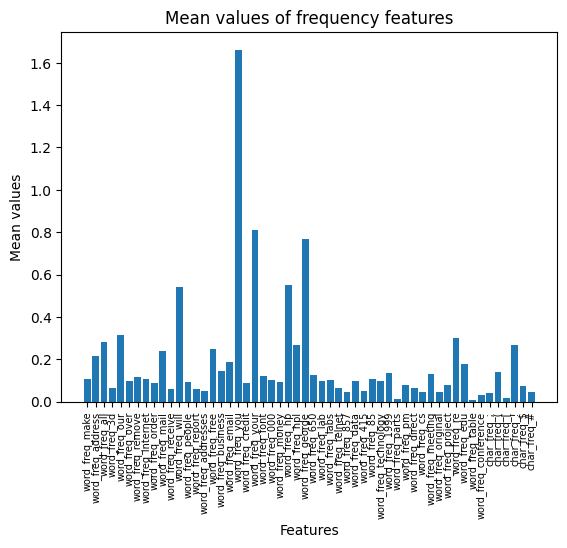

In [80]:
# Extract the columns that contain 'freq' in their name
freq_columns = [col for col in df.columns if 'freq' in col]

# Calculate the mean value of each frequency feature
mean_values = df[freq_columns].mean()

plt.bar(x=freq_columns, height=mean_values)
plt.xticks(rotation=90, fontsize=7)
plt.title('Mean values of frequency features', fontsize=12)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Mean values', fontsize=10)
plt.show()

In [81]:
# Find the feature with the highest and lowest mean value
highest_feature = mean_values.idxmax()
lowest_feature = mean_values.idxmin()

# Print the names and mean values of the features
print(f"Highest frequency feature: {highest_feature} (mean={mean_values[highest_feature]:.4f})")
print(f"Lowest frequency feature: {lowest_feature} (mean={mean_values[lowest_feature]:.4f})")

Highest frequency feature: word_freq_you (mean=1.6621)
Lowest frequency feature: word_freq_table (mean=0.0054)


Let's observe the correlation matrix between the features.

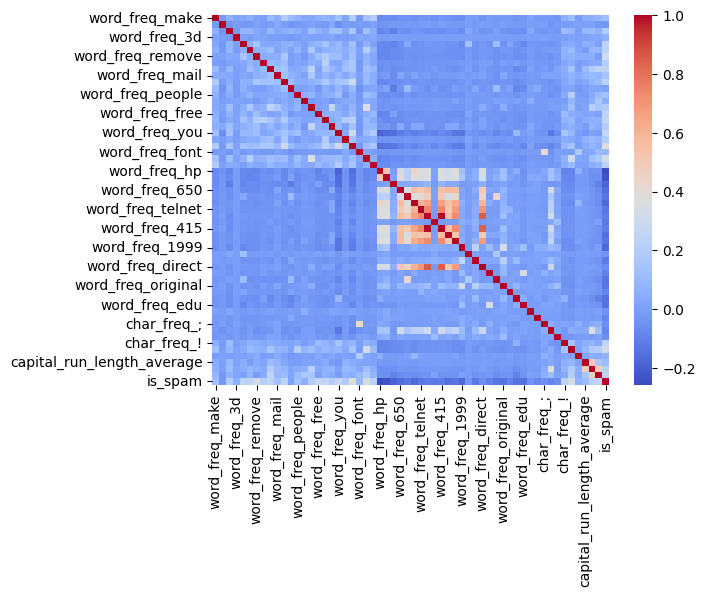

In [82]:
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

In [83]:
# Identify potentially redundant features (i.e., those with high correlation)
high_corr = corr_matrix[corr_matrix > 0.8].stack().reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'correlation']
high_corr = high_corr[(high_corr['correlation'] < 1.0) & (high_corr['correlation'] > 0.80)]
print('Potentially redundant features:\n', high_corr)

Potentially redundant features:
            feature_1         feature_2  correlation
32     word_freq_857     word_freq_415     0.996066
33     word_freq_857  word_freq_direct     0.848021
35     word_freq_415     word_freq_857     0.996066
37     word_freq_415  word_freq_direct     0.845359
43  word_freq_direct     word_freq_857     0.848021
44  word_freq_direct     word_freq_415     0.845359


In [84]:
# Remove potentially redundant features
features_to_remove = set()
for i, row in high_corr.iterrows():
    if row['feature_1'] not in features_to_remove and row['feature_2'] not in features_to_remove:
        features_to_remove.add(row['feature_2'])
df_filtered = df.drop(features_to_remove, axis=1)
print('Filtered dataset:\n', df_filtered.head())

Filtered dataset:
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00

Identifying potentially redundant features permitted us to remove two features with high correlation between them. We could try after with and without those two more columns.

In [85]:
# Remove the 'is_spam' column from the correlation matrix
corr_matrix.drop('is_spam', inplace=True)

In [86]:
# Get the top 5 features with highest correlation
top_5 = corr_matrix['is_spam'].nlargest(5)
print("Top 5 features with highest correlation:\n", top_5)

# Find the 5 features with the correlation closest to 0
abs_corr_values = abs(corr_matrix.iloc[:-1, -1])
abs_corr_values_sorted = abs_corr_values.sort_values()
features_closest_to_zero = abs_corr_values_sorted.head(5).index.tolist()

# Compute the correlation coefficients between the 5 features and the target variable
corr_coeffs = corr_matrix.loc[features_closest_to_zero, corr_matrix.columns[-1]]
print("\nCorrelation coefficients closest to 0:")
print(corr_coeffs)

# Get the top 5 features with lowest correlation
top_5 = corr_matrix['is_spam'].nsmallest(5)
print("\nTop 5 features with highest correlation:\n", top_5)

Top 5 features with highest correlation:
 word_freq_your      0.383234
word_freq_000       0.334787
word_freq_remove    0.332117
char_freq_$         0.323629
word_freq_you       0.273651
Name: is_spam, dtype: float64

Correlation coefficients closest to 0:
word_freq_will       0.007741
word_freq_address   -0.030224
word_freq_parts     -0.031035
word_freq_table     -0.044679
word_freq_3d         0.057371
Name: is_spam, dtype: float64

Top 5 features with highest correlation:
 word_freq_hp       -0.256723
word_freq_hpl      -0.232968
word_freq_george   -0.183404
word_freq_1999     -0.178045
word_freq_labs     -0.171095
Name: is_spam, dtype: float64


We will use all the columns to do the algorithm, except the two that we removed earlier. We will test the best working algorithm with the two more columns at the end.

## Splitting Data

In [87]:
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X = df_filtered.iloc[:,:-1]  # Features
y = df_filtered.iloc[:,-1]   # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


## Linear Regression Algorithm

In [88]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
clf = LogisticRegression()

# Perform 10-fold cross-validation on the training data
scores = cross_val_score(clf, X_train_scaled, y_train, cv=100)

# Print the average accuracy and standard deviation
print("Training accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Training accuracy: 0.92 (+/- 0.10)


In [89]:
# Train the classifier on the full training data
clf.fit(X_train_scaled, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test_scaled)

# Evaluate the classifier on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: %0.3f" % test_accuracy)

Test accuracy: 0.921


## Random Forest Algorithm

First, we are going to use the random forest algorithm

In [90]:
# Define the range of n_estimators to test
estimator_range = range(10, 201, 10)

# Cross-validate over the range of n_estimators
cv_scores = []
for n_estimators in estimator_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    cv_scores.append(cross_val_score(rf, X_train, y_train, cv=5).mean())

# Find the optimal number of n_estimators
optimal_n_estimators = estimator_range[cv_scores.index(max(cv_scores))]
print("The optimal number of n_estimators is:", optimal_n_estimators)

# Train the model with the optimal number of n_estimators
rf = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
test_score = rf.score(X_test, y_test)
print("The test set accuracy is:", test_score)

The optimal number of n_estimators is: 50
The test set accuracy is: 0.9543808834178131


We get an accuracy of 95.37%.
Let's use another algorithm

## Naive Bayes Algorithm

In [91]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Train the classifier on the training data
nb_clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = nb_clf.predict(X_test)

In [92]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8291093410572049


## KNN Algorithm

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Set the range of k values to search over
k_range = range(2, 31)

# Set the number of folds for cross-validation
cv = 10

# Create a k-NN classifier object
knn = KNeighborsClassifier()

# Create a dictionary of parameter values to search over
param_grid = {'n_neighbors': k_range}

In [94]:
# Perform grid search to find the best value of k
grid_search = GridSearchCV(knn, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 31)})

In [95]:
# Print the best value of k and the corresponding cross-validation accuracy
print('Best value of k:', grid_search.best_params_['n_neighbors'])
print('Cross-validation accuracy with best k:', grid_search.best_score_)


Best value of k: 3
Cross-validation accuracy with best k: 0.8043478260869564


In [96]:

# Evaluate the k-NN classifier with the best value of k on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print('Test set accuracy with best k: %0.3f' % test_accuracy)

Test set accuracy with best k: 0.781


## Decision Tree Algorithm



In [97]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform 50-fold cross-validation on the training data
scores = cross_val_score(clf, X_train, y_train, cv=50)

# Print the average accuracy and standard deviation
print("Training accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))


Training accuracy: 0.911 (+/- 0.063)


In [98]:
# Train the classifier on the full training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: %0.3f" % test_accuracy)

Test accuracy: 0.908


## Deep Learning Algorithm



In [99]:
!pip install scikeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



Training model 1...


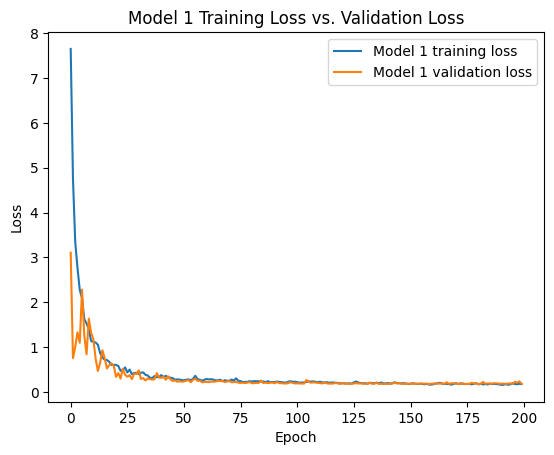

Model 1 Test Loss: 0.168, Test Accuracy: 0.940
Training model 2...


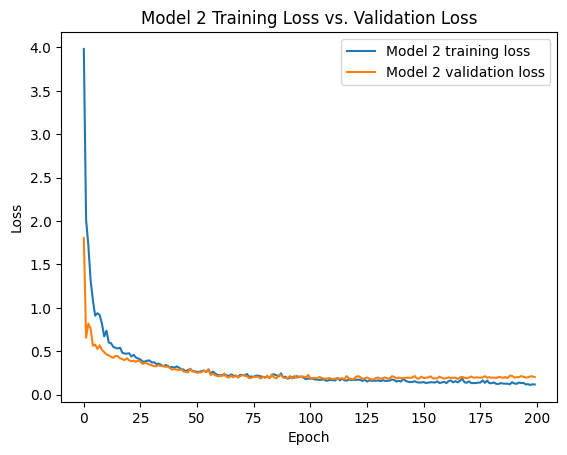

Model 2 Test Loss: 0.194, Test Accuracy: 0.941
Training model 3...


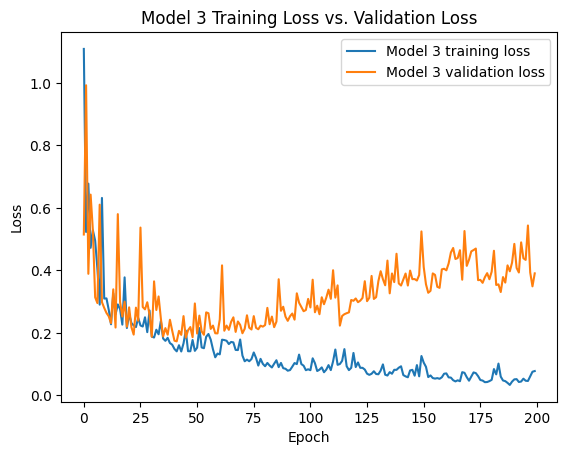

Model 3 Test Loss: 0.330, Test Accuracy: 0.929


In [101]:
from tensorflow import keras

# Define a list of models with different numbers of dense layers and dropout layers
models = []
models.append(keras.Sequential([keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(32, activation='relu'),
                                keras.layers.Dense(1, activation='sigmoid')]))
models.append(keras.Sequential([keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
                                keras.layers.Dropout(0.3),
                                keras.layers.Dense(64, activation='relu'),
                                keras.layers.Dropout(0.3),
                                keras.layers.Dense(32, activation='relu'),
                                keras.layers.Dense(1, activation='sigmoid')]))
models.append(keras.Sequential([keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),                                
                                keras.layers.Dense(128, activation='relu'),                                
                                keras.layers.Dense(64, activation='relu'),
                                keras.layers.Dense(32, activation='relu'),                               
                                keras.layers.Dense(1, activation='sigmoid')]))

for i, model in enumerate(models):
    print(f"Training model {i + 1}...")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=64, verbose=0)
    plt.plot(history.history['loss'], label=f"Model {i + 1} training loss")
    plt.plot(history.history['val_loss'], label=f"Model {i + 1} validation loss")
    plt.title(f"Model {i + 1} Training Loss vs. Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Model {i + 1} Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")

We can see that the first model is not overfitting. On the other hand, the second model starts to overfit around 125 epochs, and the last one start overfitting after 35 epochs. This is because we removed the dropout layers of the Model 3, which are preventing overfitting. I will go with the model 1, which has the best ratio with not overfitting/test accuracy.

We have run 6 algorithms to detect spams which are(from the best to the worst):
1. Random Forest (Accuracy: 0.954)
2. Deep Learning Model (Accuracy: 0.940)
3. Linear Regression (Accuracy: 0.921)
4. Decision Tree (Accuracy: 0.897)
5. Naive Bayes (Accuracy: 0.829)
6. K-Nearest Neighbors (Accurracy: 0.781)

Does it change anything if we add the two column back for Random Forest ?


In [102]:
# Split the dataset into training and testing sets
X = df.iloc[:,:-1]  # Features
y = df.iloc[:,-1]   # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data using the StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the Random Forest model with cross-validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('Cross-validation scores: {}'.format(cv_scores))
print('Mean cross-validation score: {:.3}%'.format(cv_scores.mean()*100))

# Fit the model on the entire training set and make predictions on the testing set
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}%'.format(accuracy*100))

Cross-validation scores: [0.95031056 0.94409938 0.93322981 0.95962733 0.96428571]
Mean cross-validation score: 95.0%
Accuracy: 95.655%


We can see that the two  features that we removed at the beginning was not a good idea. The random forest algorithm using all features is now the best. The actualized ranking is:
1. Random Forest with 58 columns(Accuracy:0.956)
2. Random Forest with 56 columns (Accuracy: 0.954)
2. Deep Learning Model (Accuracy: 0.940)
3. Linear Regression (Accuracy: 0.921)
4. Decision Tree (Accuracy: 0.897)
5. Naive Bayes (Accuracy: 0.829)
6. K-Nearest Neighbors (Accurracy: 0.781)

I tried to use Gradient Boosting and SVM's algorithm for this dataset, but the computing time was way too long, so i decided to use other algorithms.




***Here is a summary of the advantages and disadvantages of each algorithm, along with possible explanations for the differences in accuracy and a recommendation for what may work best for this particular problem:***
<br><br>

---

**Random Forest with 58 columns (Accuracy: 0.956)**


*Advantages*: Random Forest is an ensemble method for improving predictive performance and reducing overfitting by combining multiple decision trees. It handles both categorical and continuous variables and works well with high-dimensional datasets. It can also provide feature importance rankings to identify the model's most important variables.<br><br>
*Disadvantages*: Random Forest is a computationally intensive algorithm that may require hyperparameter tuning to achieve optimal performance. The model results can also be difficult to interpret.<br><br>
*Explanation for high accuracy*: The high accuracy could be attributed to Random Forest's ability to handle high-dimensional data, which could be the case with the Spambase dataset. Furthermore, the method's ensemble nature can reduce overfitting and improve generalization to new data.
<br><br>

---



**Random Forest with 56 columns (Accuracy: 0.954)**

*Advantages*: Same as above.<br><br>
*Disadvantages*: Same as above.<br><br>
*Explanation for slightly lower accuracy*: The removal of two columns may explain the difference in accuracy between this model and the previous one. It's possible that these two columns were crucial for prediction and that their removal resulted in a slight decrease in accuracy.<br><br>

---


**Deep Learning Model (Accuracy: 0.919)**

*Advantages*: Can learn complex patterns, extract features automatically, and handle high-dimensional and large-scale data.<br><br>
*Disadvantages*: Requires large amounts of labeled data and computational resources to train, and can be challenging to interpret and explain.<br><br>
*Explanation for lower accuracy*: I think that we don't have enough data to classify them. We only have 4500 emails, which is nothing. We could use a larger database with 100000+ emails inside.

---

**Linear Regression (Accuracy: 0.921)**

Advantages: Linear Regression is a straightforward and understandable method for dealing with both continuous and categorical variables. It can also reveal relationships between the input variables and the target variable.<br><br>
Disadvantages: Linear regression assumes a linear relationship between the input variables and the target variable, which is not always true in real-world data. It also does not handle variable interactions very well.<br><br>
Explanation for lower accuracy: Linear Regression may be unable to capture the Spambase dataset's complex nonlinear relationships between input variables and target variables.<br><br>
Recommendation: Because it achieves lower accuracy than Random Forest models, Linear Regression may not be the best choice for this problem.<br><br>


---



**Decision Tree (Accuracy: 0.897)**

*Advantages*: Decision Trees are basic and interpretable models that can handle both continuous and categorical inputs. They can also handle relationships between variables and can provide insights into the significant elements in the data.<br><br>
*Disadvantages*: Decision Trees can easily overfit the training data and may not generalize well to new data. They are also sensitive to small changes in the data and can produce different results if the data is perturbed slightly.<br><br>
*Explanation for lower accuracy*: The Decision Tree model may be overfitting the training data, leading to lower accuracy on the test data.<br><br>
*Recommendation*: Decision Trees may not be the best choice for this problem, as they achieve lower accuracy than the Random Forest models and are more prone to overfitting.<br><br>


---


**Naive Bayes (Accuracy: 0.829)**

*Advantages*: Naive Bayes is a simple and fast method that can handle both continuous and categorical variables. It can also handle high-dimensional data well and can provide probabilistic predictions.<br><br>
*Disadvantages*: Naive Bayes assumes that the input variables are independent, which may not be the case in real-world data. It can also suffer from the problem of overfitting<br><br>

